<a href="https://colab.research.google.com/github/wndnjs2037/2020_systemprogramming/blob/master/Gangseo_BigData/Gangseo_BigData/TNR_Count/%EA%B5%AC%EB%B3%84_TNR_%EC%99%84%EB%A3%8C_%EA%B0%9C%EC%B2%B4_%EC%88%98_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 동물보호관리시스템 길고양이 중성화사업(TNR) 관리 데이터 기준
# https://www.animal.go.kr/front/awtis/roadCat/roadCatList.do?menuNo=4000000027 
# 최근 5년간(2017~2021) 서울특별시 구별 고양이 TNR 완료 개체수 비교

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic') #나눔고딕 폰트 설정

In [24]:
seoul_tnr = pd.read_csv('/content/drive/MyDrive/강서구 공공데이터/Data/고양이TNR개체수_2017~2021.csv', encoding='utf-8') #고양이 TNR 개체수 파일 불러오기
seoul_tnr.head(5) #확인용

,기간,전체,강남구,강동구,깅북구,강서구,관악구,광진구,구로구,금천구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,서울특별시
0,2017,8986,450,576,228,267,661,287,399,285,...,300,465,280,356,396,289,199,250,345,780
1,2018,10413,439,691,192,208,787,296,404,325,...,360,431,351,397,467,487,287,216,363,578
2,2019,11226,549,570,280,251,958,380,431,330,...,420,502,301,500,439,338,285,351,520,553
3,2020,11274,661,326,324,289,967,426,431,347,...,232,510,300,552,514,381,283,390,520,778
4,2021,12675,701,480,383,287,827,610,430,345,...,366,577,456,486,610,609,258,508,550,461


In [52]:
seoul_tnr_trans = seoul_tnr.transpose() #행열 전환
#seoul_tnr_trans = seoul_tnr_trnas.set_index('기간') 
seoul_tnr_trans

,0,1,2,3,4
기간,2017,2018,2019,2020,2021
전체,8986,10413,11226,11274,12675
강남구,450,439,549,661,701
강동구,576,691,570,326,480
깅북구,228,192,280,324,383
강서구,267,208,251,289,287
관악구,661,787,958,967,827
광진구,287,296,380,426,610
구로구,399,404,431,431,430
금천구,285,325,330,347,345


In [31]:
seoul_trn = seoul_tnr.set_index('기간')  #기간을 인덱스로 지정
seoul_trn

,전체,강남구,강동구,깅북구,강서구,관악구,광진구,구로구,금천구,노원구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,서울특별시
기간,,,,,,,,,,,,,,,,,,,,,
2017,8986,450,576,228,267,661,287,399,285,309,...,300,465,280,356,396,289,199,250,345,780
2018,10413,439,691,192,208,787,296,404,325,631,...,360,431,351,397,467,487,287,216,363,578
2019,11226,549,570,280,251,958,380,431,330,392,...,420,502,301,500,439,338,285,351,520,553
2020,11274,661,326,324,289,967,426,431,347,497,...,232,510,300,552,514,381,283,390,520,778
2021,12675,701,480,383,287,827,610,430,345,615,...,366,577,456,486,610,609,258,508,550,461


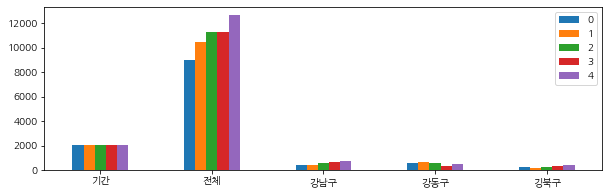

In [54]:
seoul_tnr_trans.head(5).plot.bar(rot=0, figsize=(10,3)) 

#전체 그래프를 보여주면 너무 작게 나와서 상위 하위 5개로 나누고자 함

In [144]:
df = pd.read_csv('/content/drive/MyDrive/강서구 공공데이터/Data/고양이TNR개체수(평균하위순서)_2017~2021.csv', encoding='utf-8') #고양이 TNR 개체수 파일 불러오기
df.head(5) 

,division,2017,2018,2019,2020,2021
0,강서구,267,208,251,289,287
1,종로구,199,287,285,283,258
2,강북구,228,192,280,324,383
3,도봉구,181,283,299,370,370
4,성동구,159,232,252,422,484


In [148]:
df = df.set_index('division') 
df.style.hide_index()
df.head(5)

,2017,2018,2019,2020,2021
division,,,,,
강서구,267,208,251,289,287
종로구,199,287,285,283,258
강북구,228,192,280,324,383
도봉구,181,283,299,370,370
성동구,159,232,252,422,484


In [149]:
df = df.transpose()

In [150]:
df = df.iloc[:,[0,1,2,3,4]] #상위 5개 구의 정보 가져오기
df

division,강서구,종로구,강북구,도봉구,성동구
2017,267,199,228,181,159
2018,208,287,192,283,232
2019,251,285,280,299,252
2020,289,283,324,370,422
2021,287,258,383,370,484


In [151]:
colors = ['red','orange','gold','khaki','beige'] ## 색상 지정

Text(0.5, 1.0, '2017~2021 서울시 TNR 시행 건수 하위 5개 구')

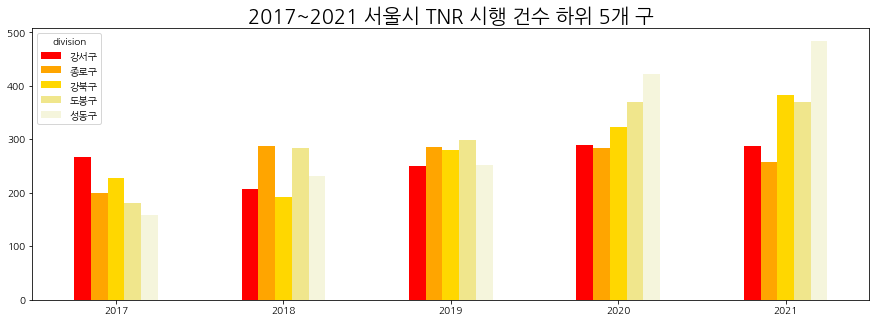

In [158]:
df.plot.bar(rot=0, figsize=(15,5), color=colors) 
plt.title("2017~2021 서울시 TNR 시행 건수 하위 5개 구", fontsize=20)

< 분석 >

강서구 면적 2위 -> 서초 강남이랑 비슷

강서구 인구 2위  -> 송파 강남이랑 비슷

면적이 비슷한 지역 -> 서초구, 강남구

인구수가 비슷한 지역 -> 송파구, 강남구

두개 구에 비해서 평균적으로 3~400마리 가량이 적게 시행됨